# PROBLEM STATEMENT

**The retail Industry faces challenges in predicting product sales across various out-let . This project aims to build a predictive model that accuratly predicts sales based on product and outlet feuters,helping bussness optimise **
- **inventory management and Improve decision making**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Introduction

This dataset information about sales across various outlets for a retail store, comprising 8,523 records and 12 attributes. It is suitable for tasks such as sales prediction or analyzing retail trends. Key attributes include:

- Item_Identifier: Unique product codes.
- Item_Weight: Weight of the product.
-  Item_Fat_Content: Indicates whether the product is low fat or regular.
- Item_Visibility: Percentage of the product's visibility in the store.
- Item_Type: Category of the product (e.g., Dairy, Soft Drinks).
- Item_MRP: Maximum Retail Price of the product.
- Outlet_Identifier: Unique codes for each store.
- Outlet_Establishment_Year: Year when the store was established.
- Outlet_Size: Size of the store (e.g., Medium, High).
- Outlet_Location_Type: Type of city where the outlet is located (e.g., Tier 1, Tier 3).
- Outlet_Type: Type of the outlet (e.g., Supermarket, Grocery Store).
- Item_Outlet_Sales: Total sales of the product in the store.

This dataset can be leveraged to uncover insights about product performance, sales trends, and store characteristics.

#  Data Analysis and Preprocessing

In [ ]:
df=pd.read_csv('/content/bigmartsales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Data Cleaning

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

<ipython-input-45-6c0bff7648f7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)
<ipython-input-45-6c0bff7648f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Outlet_Identifier', axis=1, inplace=True)

#  Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Item_Fat_Content']=oe.fit_transform(df[['Item_Fat_Content']])
df['Outlet_Size']=oe.fit_transform(df[['Outlet_Size']])
df['Outlet_Location_Type']=oe.fit_transform(df[['Outlet_Size']])
df['Outlet_Type']=oe.fit_transform(df[['Outlet_Type']])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1.0,0.016047,4,249.8092,1999,1.0,1.0,1.0,3735.1380
1,5.920,2.0,0.019278,14,48.2692,2009,1.0,1.0,2.0,443.4228
2,17.500,1.0,0.016760,10,141.6180,1999,1.0,1.0,1.0,2097.2700
3,19.200,2.0,0.000000,6,182.0950,1998,1.0,1.0,0.0,732.3800
4,8.930,1.0,0.000000,9,53.8614,1987,0.0,0.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13,214.5218,1987,0.0,0.0,1.0,2778.3834
8519,8.380,2.0,0.046982,0,108.1570,2002,1.0,1.0,1.0,549.2850
8520,10.600,1.0,0.035186,8,85.1224,2004,2.0,2.0,1.0,1193.1136
8521,7.210,2.0,0.145221,13,103.1332,2009,1.0,1.0,2.0,1845.5976


Machine learning algorithms typically require numerical inputs, so:

1. Label Encoding is used to convert Item_Type (with multiple categories) into numerical labels.

2. Ordinal Encoding is applied to features like Item_Fat_Content, Outlet_Size, Outlet_Location_Type, and Outlet_Type to transform ordinal or categorical data into numerical form while preserving relative ordering (if any).

# Data Visualization

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

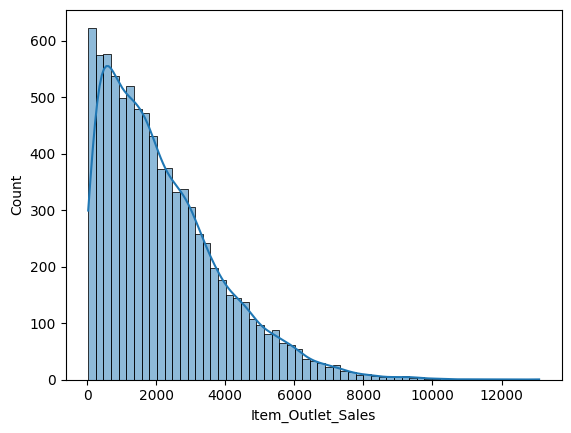

In [ ]:
sns.histplot(df['Item_Outlet_Sales'], kde=True)#finding distribution of the target

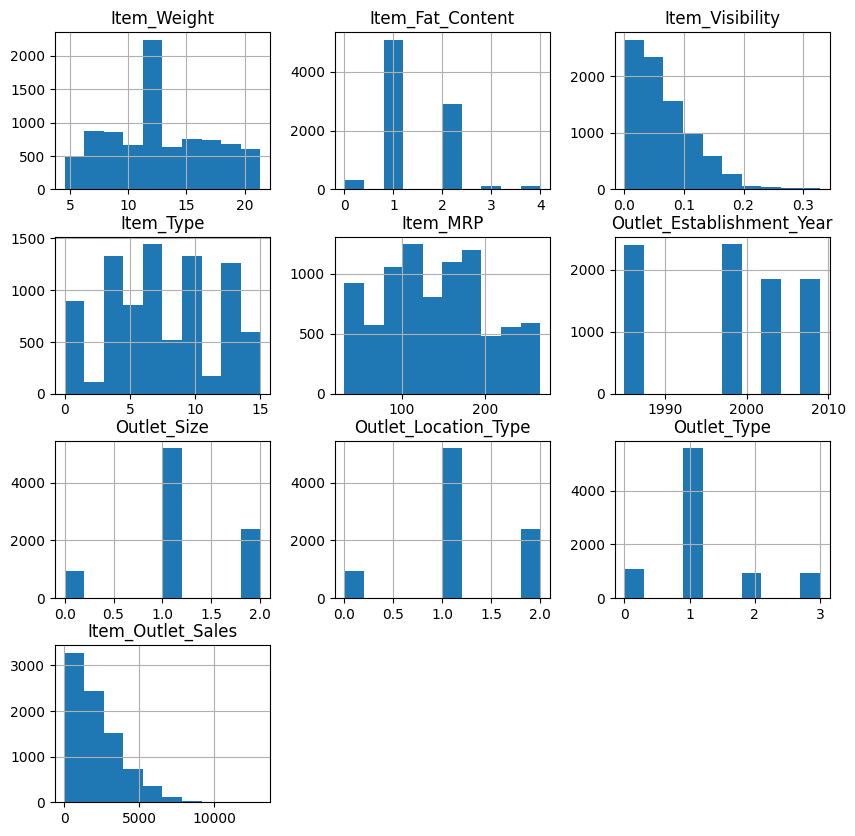

In [ ]:
df.hist(figsize=(10,10))#finding distribution of all features
plt.show()

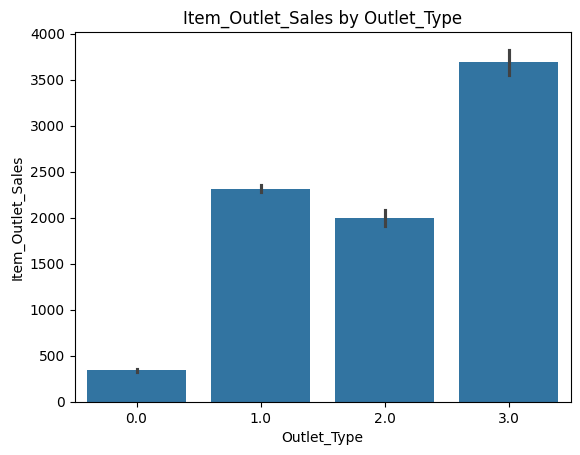

In [ ]:
# Bivariate analysis:Item_Outlet_Sales by 'Outlet_Type'
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Item_Outlet_Sales by Outlet_Type')
plt.show()

1. Distribution of Item_Outlet_Sales: A histogram with a KDE curve showing the distribution of the target variable.
2. Distribution of All Features: A grid of histograms for each feature in the dataset to understand their individual distributions.
3. Bivariate Analysis (Item_Outlet_Sales vs. Outlet_Type): A barplot showing the average sales for each outlet type to explore relationships between the target and categorical feature.

# Correlation Analysis and Treatment

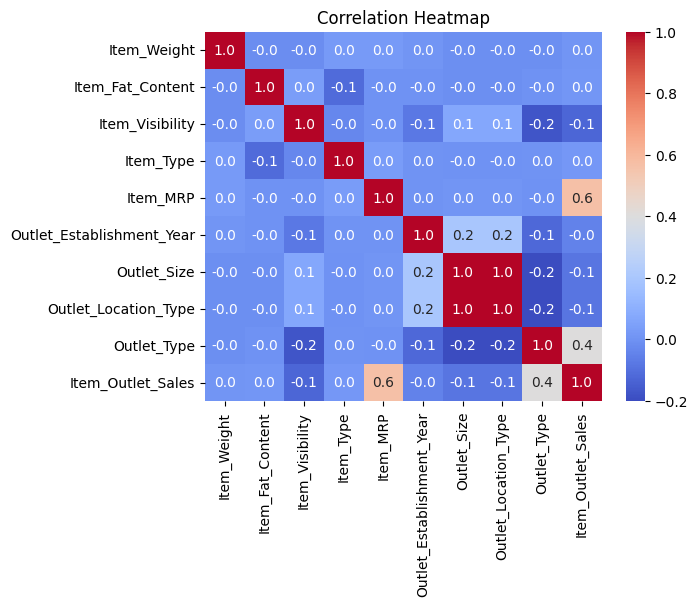

In [ ]:
#visualising correlation throgh a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cor=df.corr()['Item_Outlet_Sales']#finding correlation of the features with the target veriable
cor.sort_values(ascending=False)

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.567574
Outlet_Type,0.401522
Item_Type,0.017048
Item_Fat_Content,0.009800
Item_Weight,0.009693
Outlet_Establishment_Year,-0.049135
Outlet_Size,-0.086182
Outlet_Location_Type,-0.086182
Item_Visibility,-0.128625


In [ ]:
df.drop('Outlet_Location_Type', axis=1, inplace=True)
df.drop('Item_Type', axis=1, inplace=True)
df.drop('Item_Fat_Content', axis=1, inplace=True)
df.drop('Item_Weight', axis=1, inplace=True)
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)
df.drop('Outlet_Size', axis=1, inplace=True)
df.drop('Item_Visibility', axis=1, inplace=True)

1. **Correlation Heatmap:**

-  A heatmap was plotted to visualize the relationships between features. This helps identify strong or weak correlations between variables.

2. **Feature Correlation with Target:**

-  The correlation of each feature with Item_Outlet_Sales was calculated. Features with weak or irrelevant correlations can be considered for removal.
Feature Removal:

3. **Based on the analysis, the following features were dropped:**
- Outlet_Location_Type, Item_Type, Item_Fat_Content, Item_Weight, Outlet_Establishment_Year, Outlet_Size, and Item_Visibility.
This step helps reduce noise in the data, focusing only on the most relevant features.

# Outliers and loging

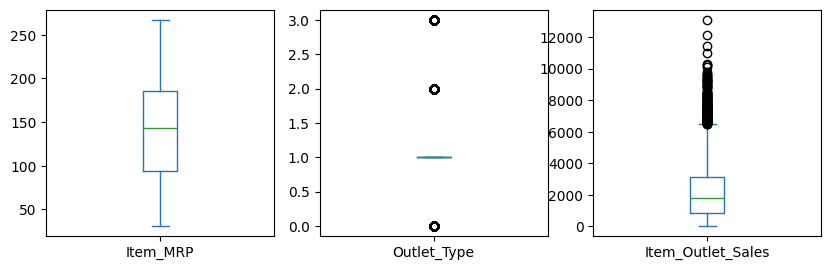

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))
plt.show()

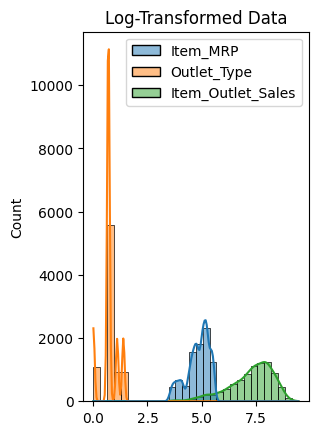

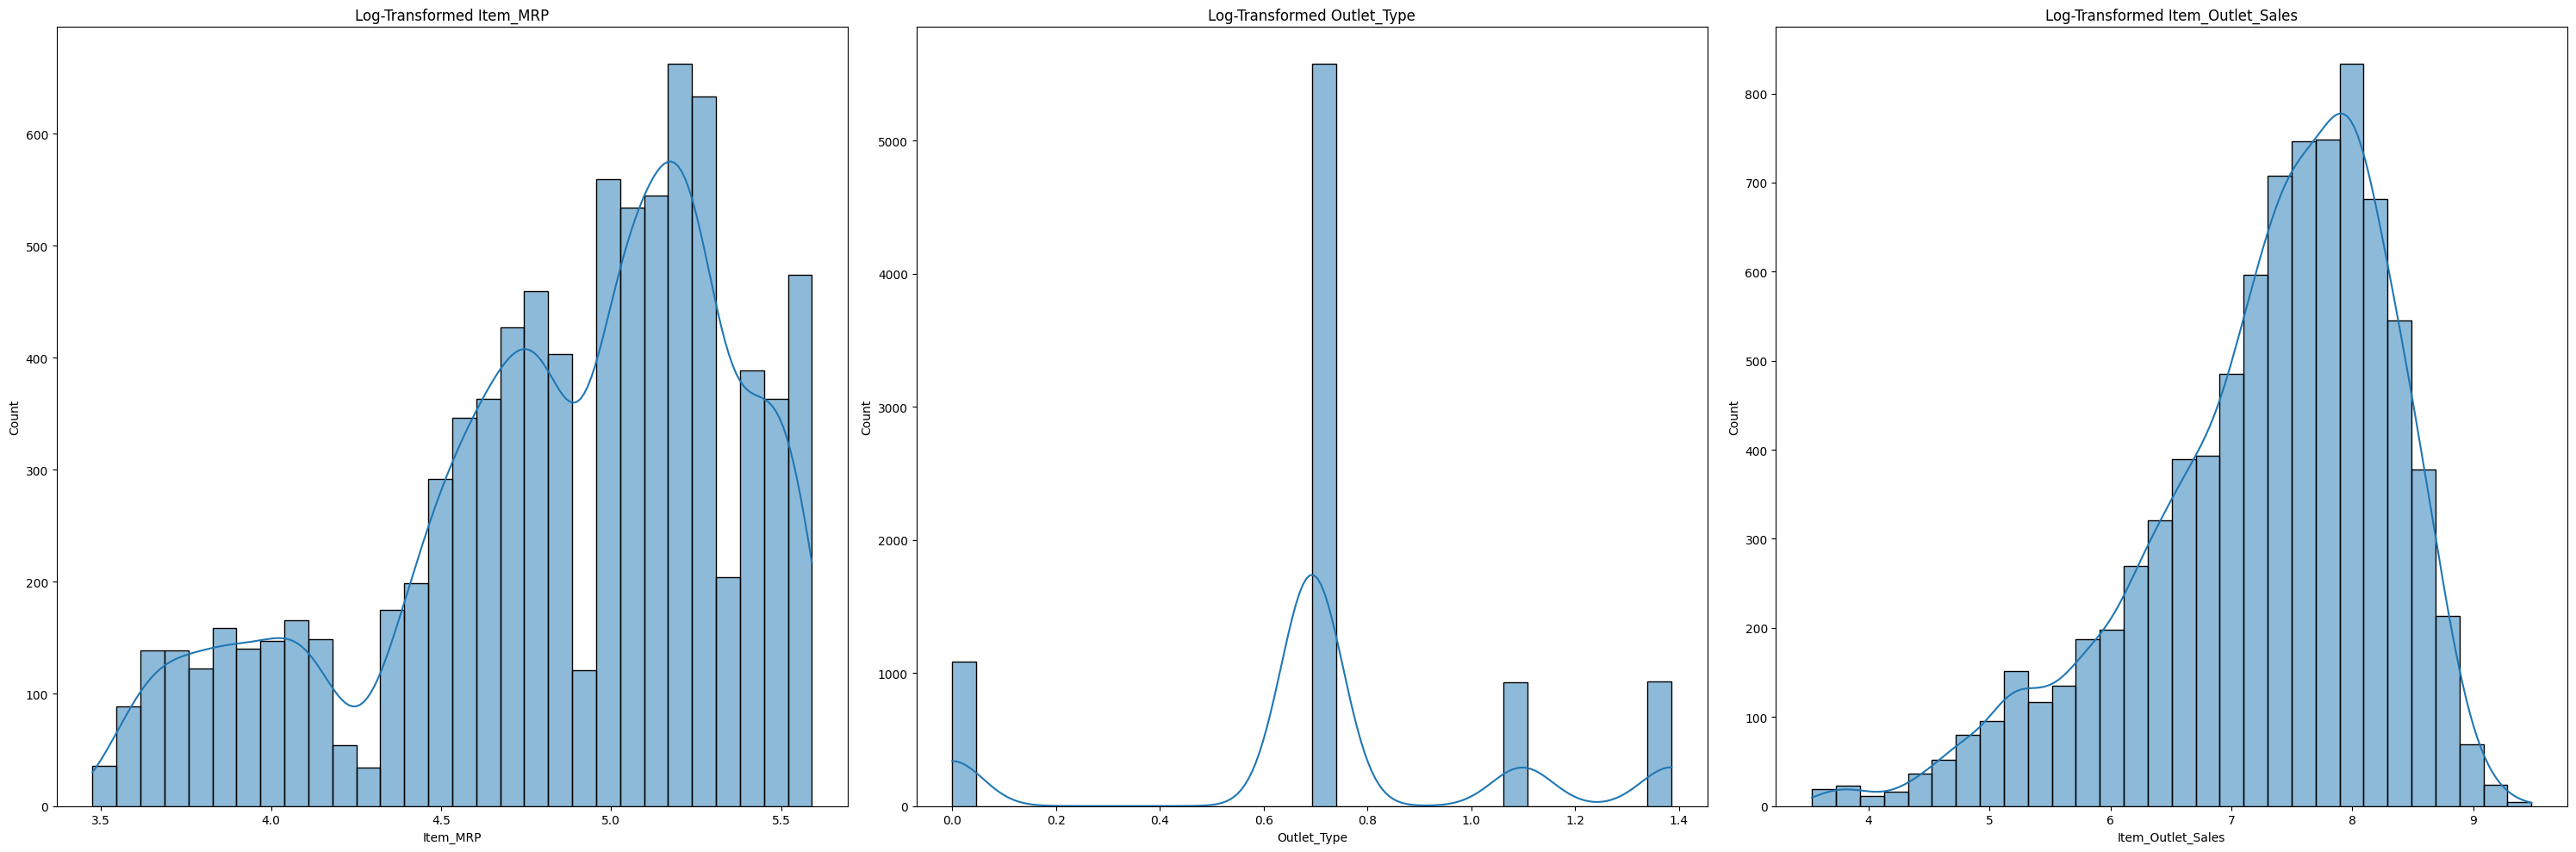

In [ ]:
#To handle skewness
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(30, 10))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()
df=log_data

In [ ]:
df.shape

(8523, 3)

# Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
df.columns

Index(['Item_MRP', 'Outlet_Type', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
# Independent features
IF = ['Item_MRP', 'Outlet_Type']

# Dependent feature (AQI)
DF = ['Item_Outlet_Sales']

# Extract independent features as input (X)
x = df[IF]

# Extract dependent feature as output (y)
y = df[DF]

In [ ]:
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(6818, 2)
(1705, 2)
(6818, 1)
(1705, 1)


In [ ]:
# Create a Random Forest Classifier object
model_rf = RandomForestRegressor()  # You can adjust hyperparameters
# Train the model
model_rf.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred=model_rf.predict(X_scaled)
y_pred

mse=mean_squared_error(y,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y,y_pred)#An indicator of average absolute prediction error
rmse=root_mean_squared_error(y,y_pred)#An indicator of average squared prediction error.
r2=r2_score(y,y_pred)#An indicator of the model’s fit quality.
print('root mean squared error:',rmse)
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

root mean squared error: 0.28104399744347475
mean squared error: 0.07898572849900783
mean absolute error: 0.20984797957674908
r2 score: 0.9233545117996939
